In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Forum and users mailing list mining

## Extract data from mailing list

Mailing list data is extracted on a number per mails per months with sender from the KTH team. For the the whole mailing list is downloaded first.

In [3]:
cat get-data.sh

cd data
for year in 2020; do
  for month in January February March April May June July August September October November December; do
    wget https://mailman-1.sys.kth.se/pipermail/gromacs.org_gmx-users/${year}-${month}.txt.gz --no-check-certificate
  done
done

gunzip *.gz


A bash script then extracts the values into .svg

In [4]:
cat extract.sh

cd data
for year in 2019 2020; do
for month in January February March April May June July August September October November December;do
for name in abraham bauer blau lindahl pall villa hess jordan zhmurov; do
  num=$(grep -R "^From: .*"$name".* " $year-$month.txt | wc | awk '{print $1}')
  # convert month names to numbers
  echo $(date --date="01 $month $year" +"%Y %m") $name $num
done
done
done



In [5]:
!./extract.sh > stats.csv

grep: 2020-June.txt: No such file or directory
grep: 2020-June.txt: No such file or directory
grep: 2020-June.txt: No such file or directory
grep: 2020-June.txt: No such file or directory
grep: 2020-June.txt: No such file or directory
grep: 2020-June.txt: No such file or directory
grep: 2020-June.txt: No such file or directory
grep: 2020-June.txt: No such file or directory
grep: 2020-June.txt: No such file or directory
grep: 2020-July.txt: No such file or directory
grep: 2020-July.txt: No such file or directory
grep: 2020-July.txt: No such file or directory
grep: 2020-July.txt: No such file or directory
grep: 2020-July.txt: No such file or directory
grep: 2020-July.txt: No such file or directory
grep: 2020-July.txt: No such file or directory
grep: 2020-July.txt: No such file or directory
grep: 2020-July.txt: No such file or directory
grep: 2020-August.txt: No such file or directory
grep: 2020-August.txt: No such file or directory
grep: 2020-August.txt: No such file or directory
grep: 2

In [6]:
mailingList = pd.read_csv('stats.csv',
                          delim_whitespace=True,
                          header=None,
                          names=["Year", "Month", "User", "Answers"])
mailingList.set_index(["Year","Month","User"], inplace=True)

In [7]:
# To check if everything worked, let's have a look at January 2020
mailingList.loc[2020,1]

Answers
User            
abraham        5
bauer          4
blau          11
lindahl        0
pall           9
villa         46
hess           0
jordan         0
zhmurov        0

## Extract data from forum

Forum data is extracted via the search function. Searching for all topics by an author.

This is a javascript query, so we use a headerless browser that knows javascript for this.

In contrast to the mailing list, we can only query for topics. To make things consistent, we use an empirical factor of two posts per topic to make the data consistent.

In [8]:
cat savepage.js

var system = require('system');
var page = require('webpage').create();

page.open(system.args[1], function()
{
    console.log(page.content);
    phantom.exit();
});


In [9]:
cat query-forum.sh

#!/bin/bash
phantomjs --web-security=no savepage.js "https://gromacs.bioexcel.eu/search?q=%40$1%20after%3A$2-$3-01%20before%3A$2-$3-31" > page.html

# have alook on how often post_number appears in the downloaded page
posts=$(grep -o "post_number" page.html | wc | awk '{print $1}')
# posts are counted double by looking at post_number, thus divide by 2
echo $((posts/2))


In [17]:
def queryOnBash(name, year, month):
    import time
    nr_topics = !./query-forum.sh {name} {year} {month}
    print("{} {} {} {}".format(name, year, month, nr_topics))
    time.sleep(2)
    return nr_topics

forumUserNames = {
    'abraham': 'mabraham',
    'bauer': 'pbauer',
    'blau': 'cblau',
    'lindahl': 'lindahl',
    'pall': 'pszilard',
    'villa': 'avilla',
    'villa2': 'alevilla',
    'hess': 'hess',
    'jordan': 'joe',
    'zhmurov': 'zhmurov'
}

for year in [2020, 2021]:
    result = { 
        month:{ 
            name:queryOnBash(forumUserNames[name],year,month)[0]
            for name in forumUserNames
        }
        for month in range(1,13)
    }  

mabraham 2020 1 ['0']
pbauer 2020 1 ['0']
cblau 2020 1 ['0']
lindahl 2020 1 ['0']
pszilard 2020 1 ['0']
avilla 2020 1 ['0']
alevilla 2020 1 ['0']
hess 2020 1 ['0']
joe 2020 1 ['0']
zhmurov 2020 1 ['0']
mabraham 2020 2 ['0']
pbauer 2020 2 ['0']
cblau 2020 2 ['0']
lindahl 2020 2 ['0']
pszilard 2020 2 ['0']
avilla 2020 2 ['0']
alevilla 2020 2 ['0']
hess 2020 2 ['0']
joe 2020 2 ['0']
zhmurov 2020 2 ['0']
mabraham 2020 3 ['0']
pbauer 2020 3 ['0']
cblau 2020 3 ['0']
lindahl 2020 3 ['0']
pszilard 2020 3 ['0']
avilla 2020 3 ['0']
alevilla 2020 3 ['0']
hess 2020 3 ['0']
joe 2020 3 ['0']
zhmurov 2020 3 ['0']
mabraham 2020 4 ['0']
pbauer 2020 4 ['0']
cblau 2020 4 ['0']
lindahl 2020 4 ['0']
pszilard 2020 4 ['0']
avilla 2020 4 ['2']
alevilla 2020 4 ['0']
hess 2020 4 ['0']
joe 2020 4 ['0']
zhmurov 2020 4 ['0']
mabraham 2020 5 ['0']
pbauer 2020 5 ['1']
cblau 2020 5 ['25']
lindahl 2020 5 ['0']
pszilard 2020 5 ['3']
avilla 2020 5 ['5']
alevilla 2020 5 ['5']
hess 2020 5 ['0']
joe 2020 5 ['0']
zhmurov 20

In [18]:
forumAnswers = pd.DataFrame(result).astype('int').rename_axis(index='User', columns="Month")

In [19]:
allForumAnswers = pd.concat({2020: pd.DataFrame(forumAnswers.T.stack(), columns = ['Answers'])}, names=['Year'])

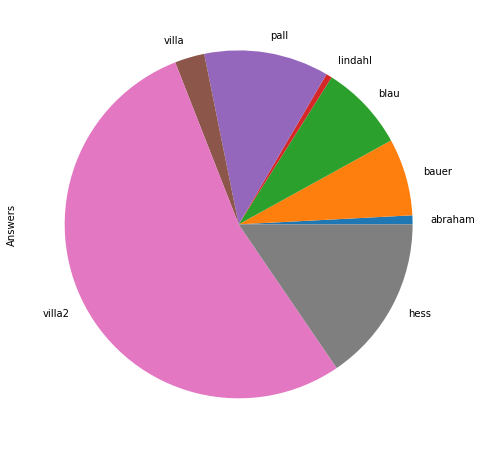

In [20]:
import seaborn as sns
pot = allForumAnswers.groupby('User').sum().plot.pie(y='Answers', figsize=(8,8),legend=None)
pot.get_figure().savefig('out.png')

## Statistics on the results

In [21]:
groupedByMonth = allForumAnswers.groupby(['Year','Month'])["Answers"].sum()
print(groupedByMonth)

Year  Month
2020  1        84
      2        63
      3        69
      4        68
      5        44
      6        34
      7         0
      8         0
      9         0
      10        0
      11        0
      12        0
Name: Answers, dtype: int64


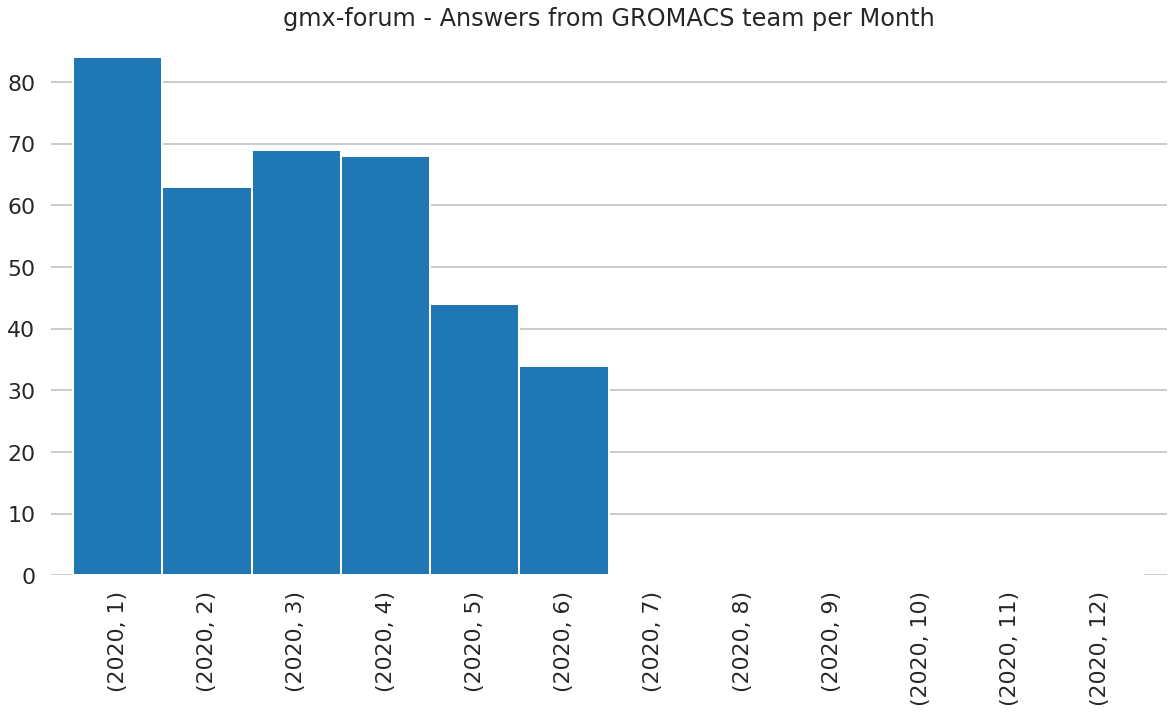

In [22]:
sns.set_context('poster')
sns.set_style('whitegrid')

fig, ax  = plt.subplots(figsize=(20,10))
# plt.locator_params(nbins=12)
sns.despine(left=True,bottom=True)
groupedByMonth[:].plot.bar(ax=ax, style='.', width=1)
ax.set_ylim(bottom=0)
ax.set_xlabel('')
plt.grid(axis='x')
ax.set_title('gmx-forum - Answers from GROMACS team per Month')
plt.savefig('gmx-users.svg')

## Quaterly numbers

In [23]:
def print_quarterly(year):
    # jan+ feb+ mar
    print("Quarter 1 - {0}".format(groupedByMonth[year][0:3].sum()))
    # apr + may + jun
    print("Quarter 2 - {0}".format(groupedByMonth[year][3:6].sum()))
    # jul + aug + sep
    print("Quarter 3 - {0}".format(groupedByMonth[year][6:9].sum()))
    # oct + nov + dec
    print("Quarter 4 - {0}".format(groupedByMonth[year][9:12].sum()))
    print("Total - {0}".format(groupedByMonth[year].sum()))

In [24]:
## Evaluation for 2021

In [25]:
print_quarterly(2021)

KeyError: 2021

## Evaluation for 2020

In [26]:
print_quarterly(2020)

Quarter 1 - 216
Quarter 2 - 146
Quarter 3 - 0
Quarter 4 - 0
Total - 362


304 emails - Answered user questions on the gmx-users mailing list or `gromacs.bioexcel.eu` from KTH personell

-> 304/4 = 76 unique people were helped on the mailing list or on the forum over the last year

## Evaluation for 2019

In [27]:
print_quarterly(2019)

KeyError: 2019

535 emails - Answered user questions on the gmx-users mailing list from KTH personell
3988 mails in total , 591 unique users on mailing list - 6.7 mails per person - assuming people like us send far more emails than people asking questions, a save estimate seems to be 4 mails of people asking questions

-> 535/4 = 134 unique people were helped on the mailing list over the last year

Face-to-face interactions - estimates on people interacted with

 - 5 people - provided UCB with GPU cluster hardware and design recommendations for running molecular simulations.
 - 7 people - Provided Roche Large Molecule Research with recommendations on how to run molecular dynamics simulations and queried about pain-points on GROMACS usage
 - 6 people - Provided Infiniti Cloud computing consulting with advice on how to set up performant and cost-efficient GROMACS simulations with AWS
 - 3 people - Provided Abavium start-up with initial assessment of GROMACS role within structural bioinformatics
 - 9 people - Paul Bauer visit in Oxford
 - 10 people - Visited AstraZeneca in Gothenburg and provided custom support
 - 10 people - BioExcel Seasonal School Stockholm (that were not interviewed)
 - 12 people - BioExcel Summer School Pula
 - 10 people - CSC workshop Finland
 - 6 people - Janssen interaction on cryo-EM
 - 11 people - Face-to-face interviews to advanced users in MD simulation during the PRACE/BioExcel Seasonal School at KTH
 - 3 people - Follow up in-depth interviews

92 interactions

# Redmine mining

In [ ]:
from statistics import median
from redminelib import Redmine

In [ ]:
redmine = Redmine('https://redmine.gromacs.org', key='be1dc392193ce140d5dcacd5ce239a491039ac78')
closed_issues = redmine.issue.filter(project_id='gromacs', status_id='closed')
open_issues = redmine.issue.filter(project_id='gromacs', status_id='open')
versions = redmine.version.filter(project_id='gromacs')
listofversions = ["2018", "2018.1", "2018.2", "2018.3", "2018.4", "2018.5", "2018.6", "2018.7", "2018.8","2019", "2019.1", "2019.2", "2019.3", "2019.4", "2019.5", "2020","2020.1","2020.2"]

In [ ]:
number_of_open_issues = len(open_issues)
number_of_closed_issues = len(closed_issues)

## 2020 report 

In [ ]:
openCreated2020 = [ issue for issue in open_issues 
                   if issue.created_on.year == 2020 and issue.tracker.name == 'Bug']
closedCreated2020 = [ issue for issue in closed_issues 
                     if issue.created_on.year == 2020 and issue.tracker.name == 'Bug']
totalCreated2020 = openCreated2020 + closedCreated2020
for quarter in [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]:
    authors = [issue.author.name for issue in totalCreated2020 if issue.created_on.month in quarter]
    print("\nTotal bugs reported in quarter : {}".format(len(authors)))
    print("Estimated number on request from non-developers : {}".format(round(len(authors)/2)))
    for author in set(authors):
        print("{} : {}".format(author, authors.count(author)))

In [ ]:
for named_version in listofversions:
    for version in versions:
        if (named_version == version.name):
            print("========Data for version "+version.name + "=========")
            #print(version.id)
            #print(version.due_date)
            #print(version.created_on)
            number_of_fixed_highbugs = 0
            number_of_fixed_bugs = 0
            number_of_closed_tasks = 0
            number_of_completed_features = 0
            number_of_closed_issues_without_target = 0
            time_for_high_priority_issues = []
            time_for_other_issues = []
            for single_issue in closed_issues:
                try:
                    if (version.id == single_issue.fixed_version.id):
                        if (single_issue.tracker.name == 'Bug'):
                            if (single_issue.priority.name == 'High'):
                                number_of_fixed_highbugs += 1
                                time_for_high_priority_issues.append(
                                        (single_issue.closed_on - single_issue.created_on).days)
                            else:
                                number_of_fixed_bugs += 1
                                time_for_other_issues.append(
                                        (single_issue.closed_on - single_issue.created_on).days)
                        if (single_issue.tracker.name == 'Feature'):
                            number_of_completed_features += 1
                        if (single_issue.tracker.name == 'Task'):
                            number_of_closed_tasks += 1
                except:
                        number_of_closed_issues_without_target += 0
            print_string = "Number of high priority bugs fixed in version "+version.name
            print_string = print_string + " "+str(number_of_fixed_highbugs)
            print(print_string)
            if not time_for_high_priority_issues:
                print_string = "No high priority issues in version "+version.name
            else:
                print_string = "Median time for closing high priority issues in version "+version.name+" in days\n\t"
                print_string += str(median(time_for_high_priority_issues))
                print_string += "\nIndividual issue times in days:\n\t"
                print_string += str(time_for_high_priority_issues).strip('[]')

            print(print_string)

            if not time_for_other_issues:
                print_string = "No other issues in version "+version.name
            else:
                print_string = "Median time for other issues in version "+version.name+" in days\n\t"
                print_string += str(median(time_for_other_issues))

            print(print_string)

            print_string = "Number of bugs fixed in version "+version.name
            print_string = print_string + " "+str(number_of_fixed_bugs)
            print(print_string)
            print_string = "Number of features completed in version "+version.name
            print_string = print_string + " "+str(number_of_completed_features)
            print(print_string)
            print_string = "Number of tasks completed in version "+version.name
            print_string = print_string + " "+str(number_of_closed_tasks)
            print(print_string)

## 2019 report

In [ ]:
openCreated2019 = [ issue for issue in open_issues 
                   if issue.created_on.year == 2019 and issue.tracker.name == 'Bug']
closedCreated2019 = [ issue for issue in closed_issues 
                     if issue.created_on.year == 2019 and issue.tracker.name == 'Bug']
totalCreated2019 = openCreated2019 + closedCreated2019
for quarter in [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]:
    authors = [issue.author.name for issue in totalCreated2019 if issue.created_on.month in quarter]
    print("\nTotal bugs reported in quarter : {}".format(len(authors)))
    print("Estimated number on request from non-developers : {}".format(round(len(authors)/2)))
    for author in set(authors):
        print("{} : {}".format(author, authors.count(author)))

In [ ]:
issue_overview_string = "Currently there are "+str(number_of_open_issues)+" open issues and "+str(number_of_closed_issues)+" closed issues"
print(issue_overview_string)